<i>The trotter formula</i>: For bounded operators $A$ and $B$, the following relation is satisfied.

$$
e^{A+B} = \lim_{n\rightarrow \infty} (e^{A/n} e^{B/n})^n
$$

We seek to test the validity of the approximation

$$
e^{-i (H_1 + H_2 + \cdots + H_n) t/\hbar} \approx (e^{-i H_1 t/m\hbar} e^{-i H_2 t/m\hbar} \cdots e^{-i H_n t/m\hbar})^m
$$

for different values of positive integers $M$. We let the time-evolution operator as $U = e^{-i (H_1 + H_2+ \cdots) t/\hbar}$ and the approximate time-evolution operator, which is not unitary, as $\tilde{U}_m = (e^{-i H_1 t/m\hbar} e^{-i H_2 t/m\hbar}\cdots)^m$.

To quantify the error of this approximation, we look for the overlap between two states:


$$U |i \rangle = e^{-i (H_1 + H_2+ \cdots H_n) t/\hbar}|i\rangle  \quad \textrm{and}\quad \tilde{U}_m |i\rangle =(e^{-i H_1 t/m\hbar} e^{-i H_2 t/m\hbar}\cdots e^{-i H_n t/m\hbar})^m |i\rangle,$$

which are the states obtained by time-evolution and the corresponding approximated time-evolution. If the approximation holds, the overlap $\left|\langle i | \tilde{U}_m^\dagger U | i \rangle\right|$ between the two aforementioned states would be close to 1.

As the simplest example, we consider the Rabi model, which describes an interaction of a two-level atom and a quantized mode of an optical cavity. The Hamiltonian is of the form:

$$
H = \frac{1}{2} \hbar \Omega \sigma_z + \hbar \omega a^\dagger a + \hbar g (\sigma_+ + \sigma_-) (a + a^\dagger)
$$

Here, $\hat{\sigma} = \left| e \right>\left< e \right|-\left| g \right>\left< g \right|$ where $\left|e\right>$ and $\left|g\right>$ are the excited and ground states of the two-level atom. This model is different from the Jaynes-Cummings model in which we neglect the counter-rotating terms $\sigma_+ a^\dagger$ and $\sigma_- a$.

We decompose the total Hamiltonian into two parts: 

$$
H_1 = \frac{1}{2}\hbar \Omega \sigma_z + \hbar g (\sigma_+ a^\dagger + \sigma_- a),\quad H_2 = \hbar \omega a^\dagger a + \hbar g (\sigma_+ a + \sigma_- a^\dagger).
$$

It is clear that the two Hamiltonians $H_1$ and $H_2$ does not commute, so that we CANNOT claim that $U =  \tilde{U}_m$.

In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import rcParams

In [3]:
%matplotlib inline
rcParams.update({'font.size': 18, 'text.usetex': True})

In [4]:
# make qutip available in the rest of the notebook
from qutip import *

In [5]:
tlist = np.linspace(0,50,101)

$\Omega/2\pi =\omega/2\pi= 1 \textrm{ Hz},\quad  g/2\pi= 0.05 \textrm{ Hz}$

Suppose that the atom is initially in the excited state, while there is no cavity photon existent in the beginning. $|i\rangle \equiv |0, e\rangle$

In [6]:
N = 15         # number of cavity fock states
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

In [7]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          wa * sm.dag() * sm + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [8]:
def U(H,t):
    return (-1j*H*t).expm()

def U_approx(H_list,m,t):
    mult = 1
    for m_ in range(len(H_list)):
        mult = mult * (-1j * H_list[m_] * t / m).expm()
    return mult ** m

In [21]:
tlist = np.linspace(0,50,1000)
result = mesolve(H, psi0, tlist, [], [])

In [37]:
%%timeit

result = psi0
for m_ in range(m):
    result = mesolve(H_list[-2],mesolve(H_list[-1],result,tlist/m,[],[]).states[-1],tlist/m,[],[]).states[-1]

1 loops, best of 3: 6.63 s per loop


In [30]:
result


Quantum object: dims = [[4, 2], [1, 1]], shape = [8, 1], type = ket
Qobj data =
[[ 0.00000000+0.j        ]
 [ 0.90585651+0.41988909j]
 [ 0.04252273-0.03463597j]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [-0.00704767+0.00150943j]
 [-0.00731223+0.00197318j]
 [ 0.00000000+0.j        ]]

In [22]:
result.states[-1]

Quantum object: dims = [[4, 2], [1, 1]], shape = [8, 1], type = ket
Qobj data =
[[  0.00000000e+00+0.j        ]
 [  9.30589083e-01+0.15370249j]
 [ -4.30196434e-02+0.32610096j]
 [  0.00000000e+00+0.j        ]
 [  0.00000000e+00+0.j        ]
 [ -3.63717926e-04-0.04658274j]
 [ -4.01850703e-04-0.00409059j]
 [  0.00000000e+00+0.j        ]]

In [9]:
t = 25
M = 100
ol = np.zeros(M)

for idx, m in enumerate(range(1,M+1)):
    ol[idx] = abs((U_approx(H_list,m,t)*psi0).overlap(U(H,t) * psi0))

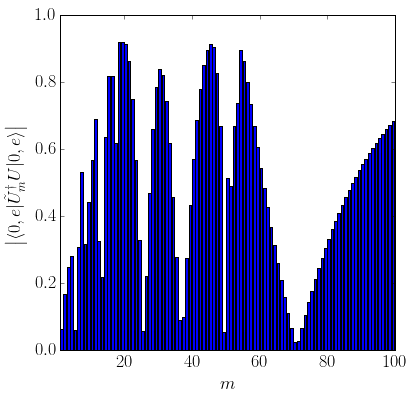

In [10]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.bar(range(1,M+1),ol)
ax.set_xlim([1, M])
ax.set_ylim([0,1])

ax.set_xlabel('$m$')
ax.set_ylabel(r'$\left|\langle 0, e | \tilde{U}_m^\dagger U  | 0, e \rangle\right| $');

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [12]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

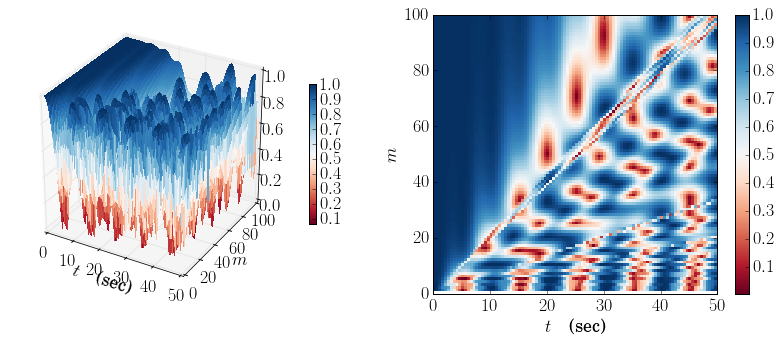

In [13]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

$g = 0.1\omega$

In [14]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          wa * sm.dag() * sm + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [15]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

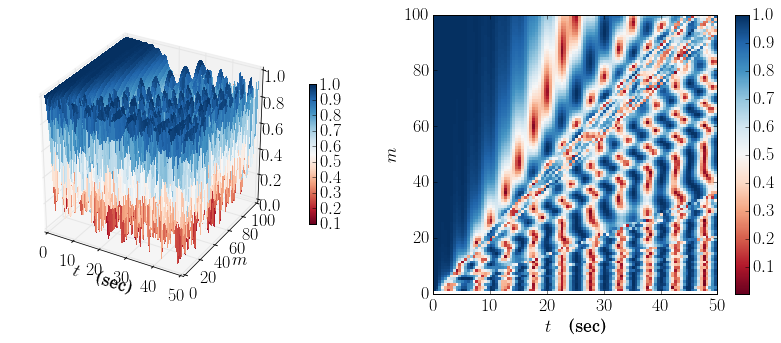

In [16]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

$g = 0.2 \omega$

In [17]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.2 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          wa * sm.dag() * sm + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [18]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

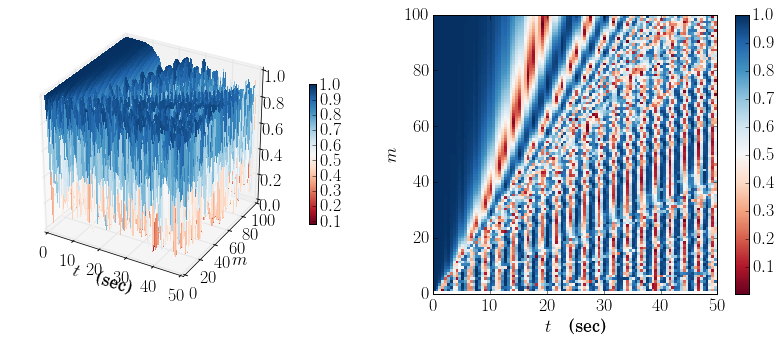

In [19]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

t/m vs. t

### Decomposition in different ways

This time, we decompose the Rabi Hamiltonian into three parts which do not (apparently) commute with each other.

$$
H = H_1 + H_2 + H_3
$$

$$H_1 = \frac{1}{2} \hbar \Omega \sigma_z + \hbar \omega a^\dagger a\quad \textrm{(non-interacting Hamiltonian)},\\  H_2 = \hbar g (\sigma_+ a^\dagger + \sigma_- a)\quad\textrm{(counter-rotating interaction Hamiltonian)},\\ H_3 = \hbar g (\sigma_+ a + \sigma_- a^\dagger) \quad \textrm{(co-rotating interaction Hamiltonian)}.$$

In [14]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [15]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

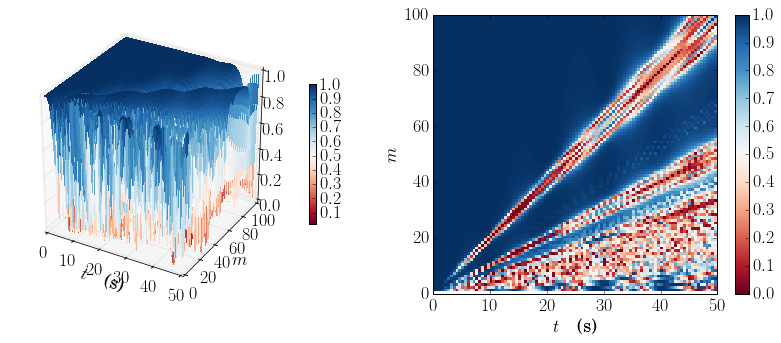

In [16]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

Increasing coupling strength ($g = 0.1\omega$),

In [28]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
#H = sum(H_list)

H = 

In [29]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

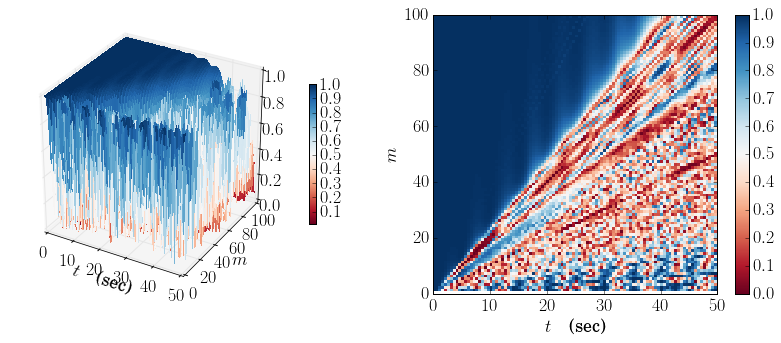

In [30]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

Increasing coupling strength ($g = 0.2\omega$),

In [31]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.2 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [32]:
X,Y = np.meshgrid(range(1,M+1), tlist)
Z = np.zeros((M,len(tlist)))
for i1 in range(M):
    for i2 in range(len(tlist)):
        Z[i1,i2] = abs((U_approx(H_list,X[i2,i1],Y[i2,i1])*psi0).overlap(U(H,Y[i2,i1]) * psi0))

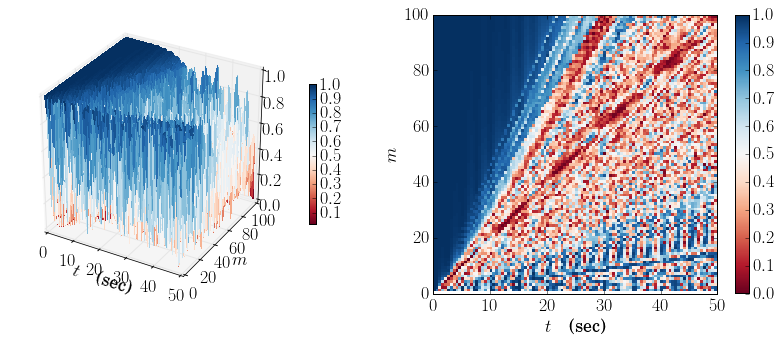

In [33]:
fig = plt.figure(figsize=(14,5))
# surface_plot with color grading and color bar
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
p = ax0.plot_surface(Y.T, X.T, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
ax0.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax0.set_ylabel(r'$m$')

ax1 = fig.add_subplot(1, 2, 2)
p = ax1.pcolor(Y.T, X.T, Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax1)
ax1.set_xlabel(r'$t \quad\textrm{(sec)}$')
ax1.set_ylabel(r'$m$');

In [37]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into five parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * a.dag() * sm.dag(),
          g * a * sm,
          g * a * sm.dag(),
          g * a.dag() * sm]
H = sum(H_list)